In [34]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("titanic.csv") 

In [36]:
print("Initial Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())

Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB
None

Missing Values:

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [37]:
df.drop(columns=['Name', 'Ticket'], inplace=True) 

In [38]:
# Fill missing Age with mean
if df['Age'].isnull().sum() > 0:
    df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with most frequent value (mode)
if df['Embarked'].isnull().sum() > 0:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [39]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
print("\nCleaned Dataset Info:\n")
print(df.info())
print("\nFirst 5 Rows of Cleaned Data:\n")
print(df.head())


Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Age          1000 non-null   int64  
 3   SibSp        1000 non-null   int64  
 4   Parch        1000 non-null   int64  
 5   Fare         1000 non-null   float64
 6   Survived     1000 non-null   int64  
 7   Sex_male     1000 non-null   bool   
 8   Embarked_Q   1000 non-null   bool   
 9   Embarked_S   1000 non-null   bool   
dtypes: bool(3), float64(1), int64(6)
memory usage: 57.7 KB
None

First 5 Rows of Cleaned Data:

   PassengerId  Pclass  Age  SibSp  Parch    Fare  Survived  Sex_male  \
0            1       3   17      4      2  144.08         1      True   
1            2       1   60      2      2  249.04         0      True   
2            3       3   64      0      0   50.31 

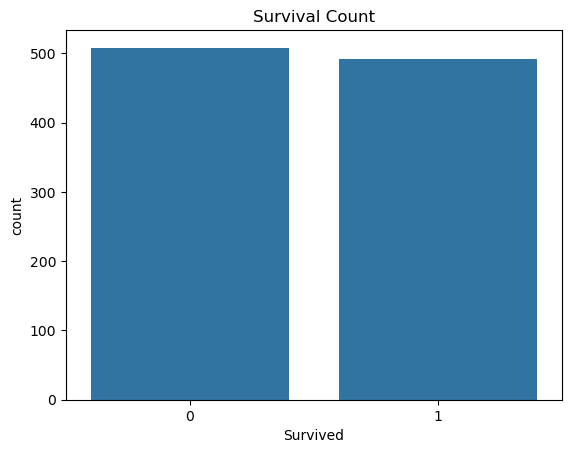

In [42]:
# 1. Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

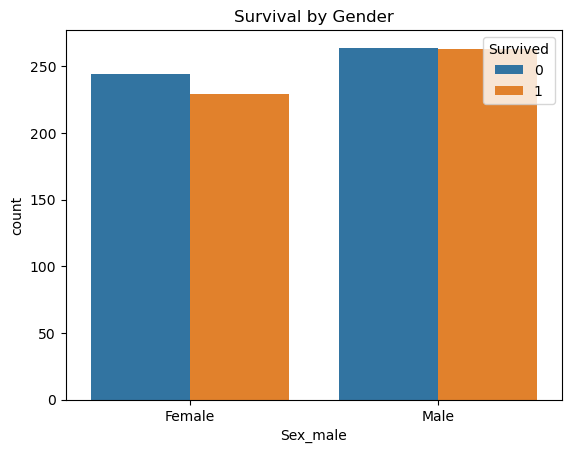

In [43]:
# 2. Survival by Sex
sns.countplot(data=df, x='Sex_male', hue='Survived')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Survival by Gender')
plt.show()

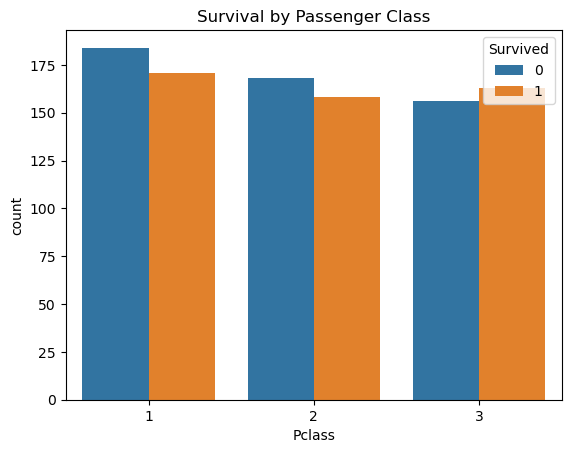

In [44]:
# 3. Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

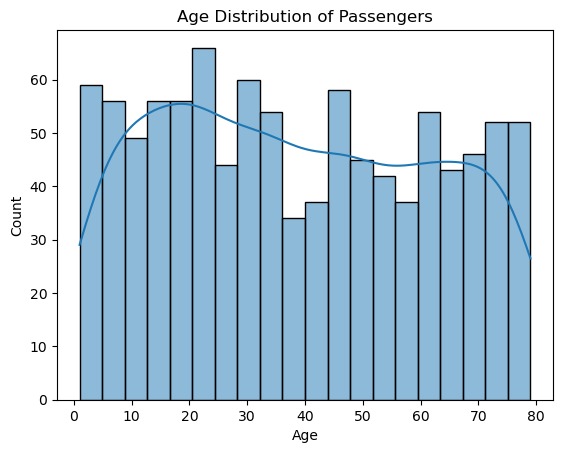

In [45]:
# 4. Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

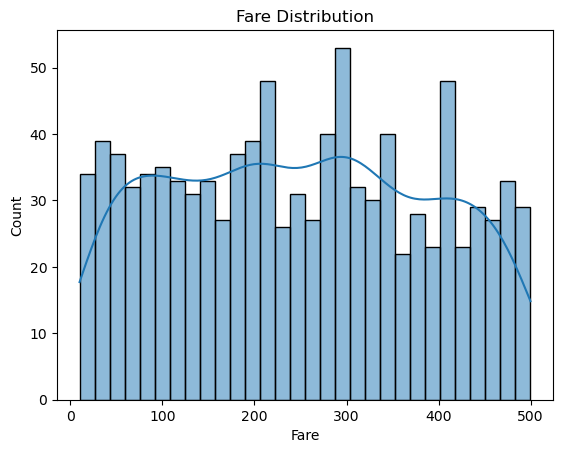

In [46]:
# 5. Fare Distribution
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

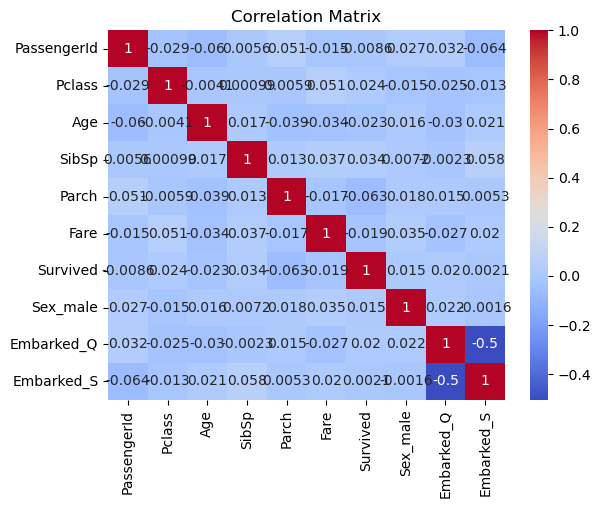

In [47]:
# 6. Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()